# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


    # Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key + "&q=" + city
   

        # Parse the JSON and retrieve data
city_weather = requests.get(city_url)
city_weather_json = city_weather.json()

print(city_weather_json)


{'coord': {'lon': -52.8699, 'lat': 68.7098}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 277.83, 'feels_like': 276.79, 'temp_min': 277.83, 'temp_max': 277.83, 'pressure': 1014, 'humidity': 76, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.46, 'deg': 264, 'gust': 1.44}, 'clouds': {'all': 91}, 'dt': 1691585946, 'sys': {'country': 'GL', 'sunrise': 1691561685, 'sunset': 1691629163}, 'timezone': -7200, 'id': 3424901, 'name': 'Aasiaat', 'cod': 200}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()                           

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | gisborne
Processing Record 3 of Set 1 | naxos
Processing Record 4 of Set 1 | moreira sales
Processing Record 5 of Set 1 | kingsville
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | humaita
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | port macquarie
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | vilhena
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 | bardai
Processing Re

City not found. Skipping...
Processing Record 40 of Set 4 | ar ruways
Processing Record 41 of Set 4 | elmendorf air force base
City not found. Skipping...
Processing Record 42 of Set 4 | west island
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | karachayevsk
Processing Record 45 of Set 4 | punta arenas
Processing Record 46 of Set 4 | aracruz
Processing Record 47 of Set 4 | taiohae
City not found. Skipping...
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | utrik
Processing Record 0 of Set 5 | extrema
Processing Record 1 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 2 of Set 5 | tazacorte
Processing Record 3 of Set 5 | vorgashor
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | amethi
Processing Record 6 of Set 5 | whitehorse
Processing Record 7 of Set 5 | salgueiro
Processing Record 8 of Set 5 | tuusula
Processing Record 9 of Set 5 | cabo san lucas
Processing Record 10 of Set 5 | solnec

Processing Record 28 of Set 8 | saint-philippe
Processing Record 29 of Set 8 | arraial do cabo
Processing Record 30 of Set 8 | sao mateus
Processing Record 31 of Set 8 | kone
Processing Record 32 of Set 8 | machico
Processing Record 33 of Set 8 | alaghsas
Processing Record 34 of Set 8 | progreso
Processing Record 35 of Set 8 | kataragama
City not found. Skipping...
Processing Record 36 of Set 8 | yelizovo
Processing Record 37 of Set 8 | de aar
Processing Record 38 of Set 8 | cambuga
Processing Record 39 of Set 8 | madison
Processing Record 40 of Set 8 | charlestown
Processing Record 41 of Set 8 | bassila
Processing Record 42 of Set 8 | pangai
Processing Record 43 of Set 8 | sitka
Processing Record 44 of Set 8 | san miguel de cauri
Processing Record 45 of Set 8 | lleida
Processing Record 46 of Set 8 | abu jibeha
Processing Record 47 of Set 8 | khasab
Processing Record 48 of Set 8 | yola
Processing Record 49 of Set 8 | osorno
Processing Record 0 of Set 9 | saint-francois
Processing Recor

Processing Record 19 of Set 12 | khovd
Processing Record 20 of Set 12 | marsh harbour
Processing Record 21 of Set 12 | cidreira
Processing Record 22 of Set 12 | hirara
Processing Record 23 of Set 12 | ulladulla
Processing Record 24 of Set 12 | puerto carreno
Processing Record 25 of Set 12 | gereida
Processing Record 26 of Set 12 | aswan
Processing Record 27 of Set 12 | yumbe
Processing Record 28 of Set 12 | fale old settlement
Processing Record 29 of Set 12 | puerto lempira
Processing Record 30 of Set 12 | mazyr
Processing Record 31 of Set 12 | arar
Processing Record 32 of Set 12 | mansa
Processing Record 33 of Set 12 | limon
Processing Record 34 of Set 12 | east ballina
Processing Record 35 of Set 12 | dongola
Processing Record 36 of Set 12 | kyaikkami
Processing Record 37 of Set 12 | ansalta
Processing Record 38 of Set 12 | mahina
Processing Record 39 of Set 12 | kuching
Processing Record 40 of Set 12 | ust'-kulom
Processing Record 41 of Set 12 | kafue
Processing Record 42 of Set 12 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,293.36,69,79,12.04,PN,1691585952
1,gisborne,-38.6533,178.0042,278.52,82,63,3.43,NZ,1691585686
2,naxos,37.1056,25.3764,301.28,72,0,11.62,GR,1691585953
3,moreira sales,-24.0622,-53.0069,290.52,81,100,3.93,BR,1691585954
4,kingsville,27.5159,-97.8561,302.05,86,20,5.14,US,1691585955


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.36,69,79,12.04,PN,1691585952
1,gisborne,-38.6533,178.0042,278.52,82,63,3.43,NZ,1691585686
2,naxos,37.1056,25.3764,301.28,72,0,11.62,GR,1691585953
3,moreira sales,-24.0622,-53.0069,290.52,81,100,3.93,BR,1691585954
4,kingsville,27.5159,-97.8561,302.05,86,20,5.14,US,1691585955


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

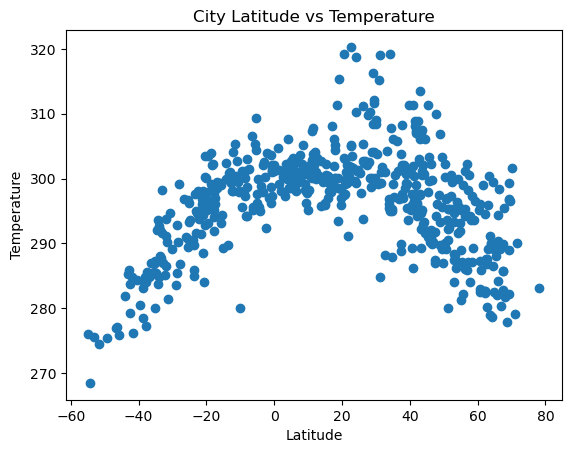

In [18]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

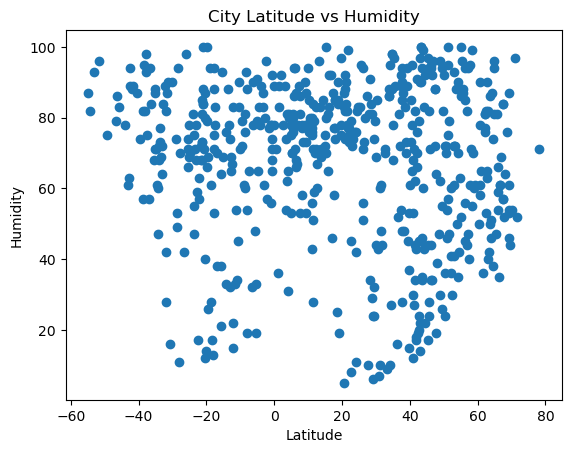

In [19]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

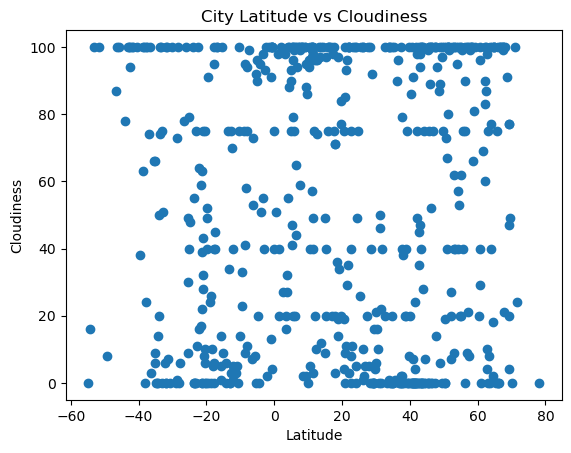

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

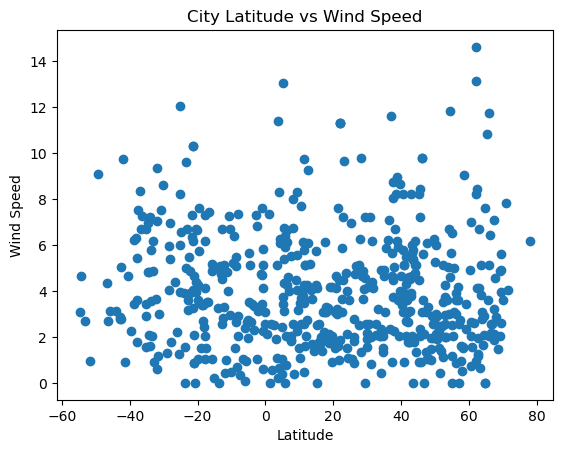

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
#def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [103]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,naxos,37.1056,25.3764,301.28,72,0,11.62,GR,1691585953
4,kingsville,27.5159,-97.8561,302.05,86,20,5.14,US,1691585955
8,albany,42.6001,-73.9662,294.58,79,100,3.13,US,1691585865
11,anadyr,64.7500,177.4833,282.43,81,100,7.60,RU,1691585959
12,isafjordur,66.0755,-23.1240,284.17,66,0,2.06,IS,1691585960


In [104]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.36,69,79,12.04,PN,1691585952
1,gisborne,-38.6533,178.0042,278.52,82,63,3.43,NZ,1691585686
3,moreira sales,-24.0622,-53.0069,290.52,81,100,3.93,BR,1691585954
5,port mathurin,-19.6833,63.4167,296.02,66,49,7.60,MU,1691585955
6,humaita,-7.5061,-63.0208,301.49,65,99,0.35,BR,1691585956


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.30576015009950885


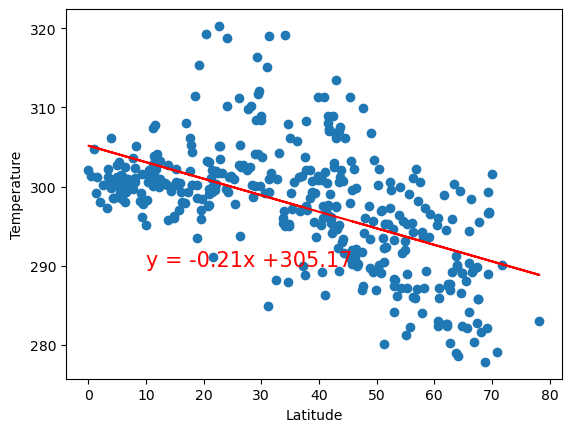

In [105]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']


regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,290),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()



The r-squared is: 0.30576015009950885


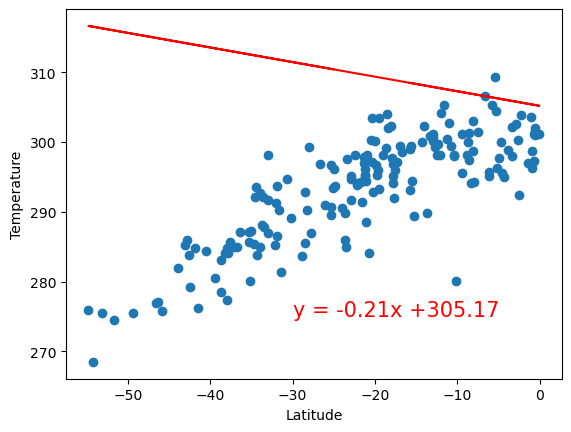

In [107]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-30,275),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE